In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
%matplotlib inline

In this lab we'll get some experience tuning a Gradient Boosted Tree classifier and then compare classifiers.

# California Housing Prices Dataset
For this lab we'll use a [dataset](https://www.kaggle.com/camnugent/california-housing-prices/data) on houses from California. Download it and place it in your lab data directory. Before we proceed to doing any kind of learning on the dataset, use some of the visualization functions you wrote for your machine elarning pipeline in assignment 2.

Dataset: https://www.kaggle.com/camnugent/california-housing-prices/data

In [15]:
fname = 'data/housing.csv'
df = pd.read_csv(fname)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The most natural thing to do with this dataset is to create a model to predict housing price given the other features. But since we've mostly only discussed classification, we'll instead try to build a model that predicts the ocean_proximity column.

Text(0,0.5,'Count')

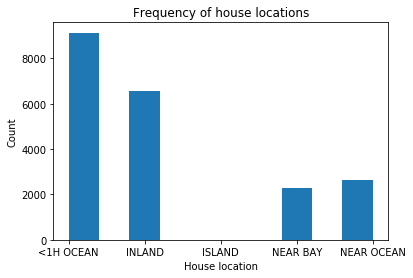

In [22]:
plt.hist(df['ocean_proximity'])
plt.title('Frequency of house locations')
plt.xlabel('House location')
plt.ylabel('Count')

1) Do any sort of necessary preprocessing like handling missing data, dealing with outliers, etc. Your code from homework 2 might be useful here.

In [25]:
# your code

2) Visualize the distributions of each feature

In [8]:
# plot stuff

3) Split the data into a train/test set.

In [29]:
# split the data

# Gradient Boosted Trees
Last week we discussed boosting in class. Gradient Boosted Trees is a model that uses shallow decision trees in conjunction with boosting to create a model with low bias(ideally). Recall the bias-variance tradeoff from lab last week. Fully grown decision trees have low bias but high variance; random forests aggregates a collection of decision trees to get a classifier that has low bias and low variance. On the otherhand, shallow decision trees have high(er) bias and low(er) variance. With boosting, we learn a collection of shallow decision trees in an iterative manner to reduce our training error; each tree tries to fit the residual error from the trees learned at earlier stages of the algorithm.

# GBT Parameters
The parameters in sklearn's [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) are mostly the same as those for the Decision Trees/[RandomForestsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with the exception of learning rate(determines how much to subsequent trees in the ensemble) and n_estimators.
Random Forests also had an n_estimators parameter. But recall in RF, increasing n_estimators will almost always improve your ability to generalize to unseen data(similar to how sampling more of a population will give you a better estimate of the population mean). However, in Gradient Boosted Trees, each tree is fit to predict the error produced by the previously built trees. If n_estimators is too high, the resulting Gradient Boosted Tree may overfit, so you need to use cross validation to determine the optimal value.

The other parameters are:
* loss : {‘deviance’, ‘exponential’}, optional (default=’deviance’)
loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with p robabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
* learning_rate : float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate.
* n_estimators : int (default=100) The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

The remaining parameters are parameters for decision trees. You should spend some time thinking about the effects of each parameter. What happens if you set them too high or too low?
* max_depth: if this is too high you'll overfit, too low and you'll underfit
* min_samples_split: higher values control against overfitting
* min_samples_leaf: higher values control against overfitting
* max_features: higher values can lead to overfitting
* max_leaf_nodes: lower values restrict the growth of the tree and which control against overfitting
* min_impurity_decrease : float, optional (default=0.) A node will be split if this split induces a decrease of the impurity greater than or equal to this value. If this is too high, the learned tree will be more conservative with splitting nodes and possibly underfit.

## Cross Validating these parameters
3) Pick a few values for each of these parameters to use for cross validation. Since there are so many parameters, and we don't want to be waiting forever for the cross validation results, you can fix a few of them.

In [28]:
loss = []
learning_rate = []
n_estimators = []
# etc

4) Write a function to do the cross validation using GridSearchCV. It might be helpful to revisit the code from last weeks.

In [30]:
# cross validation magic loop

5) Evaluate the best model on the test set

In [32]:
# test set evaluation

6) Plot the confusion matrix for the test set. Which classes are most difficult to predict?

In [34]:
# plot confusion matrix

# Classifier Comparison

In general, we're just interested in finding a _some model_ that performs the best for whatever problem we're trying to solve. In the past few weeks we've seen a bunch of classifiers:
* K Nearest Neighbors
* Decision Trees
* Logistic Regression
* SVM
* Naive Bayes
* Random Forests
* Gradient Boosted Trees
It's hard to know which classifier is best suited for the problem you're trying to solve without getting your hands dirty and just doing the classification. So let's write a function to fit/evaluate the classifiers we're interested in!

7) Change the function you wrote for cross validating GBT to allow you to do that cross validation for a collection of classifiers(along with their own set of parameters to cross validate over) or fill in the function template below.

It might be helpful to define dictionaries that map sklearn models to their param grid dictionaries.

In [43]:
def cv_evaluation(model_params, x_train, x_test, y_train, y_test):
    '''
    Given a dictionary of classifiers mapped to parameter grids to cross validate over, this
    function run cross validation for each (classifier, parameter grid) combination and returns the best
    estimator of each type of classifier
    Args:
        model_params: dict mapping sklearn model to parameter grid dictionary
    Returns:
        a 2-tuple containing:
            DataFrame containing cross validation results
            list/dictionary/or whatever containing the best estimator of each classifier
    '''

    for model, param_grid in model_params.items():
        # do stuff with GridSearchCV
        pass
    
    # return something

In [ ]:
# note that the parameter grid dictionary keys should match the spelling of the parameter of the sklearn model
model_params = {
    LogisticRegression: {'C': [10**i for i in range(-2, 3)], 'penalty': ['l1, l2']}, 
    KNeighborsClassifier: {'n_neighbors': [i for i in range(1, 9)]},
}

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
cv_results, best_classifiers = cv_evaluation(model_params, x_train, x_test, y_train, y_test)

Hint: [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) does most of this work for you. Here are some of the potentially useful attributes/functions of the GridSearchCV class:
* cv\_results
* best\_estimator\_
* best\_params_

8) Which models performed the best? Are you surprised by the results?

In [42]:
# find best performing classifiers from GridSearchCV results